<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [32]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [33]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [34]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [35]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


T-test statistic = 3.9964, p-value = 0.0001
Reject H₀: There is a significant difference in median house values based on Charles River proximity.


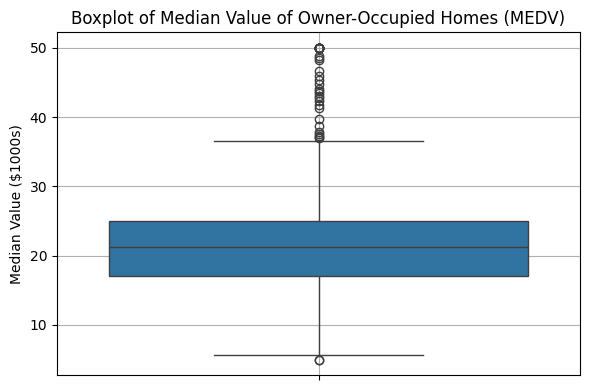

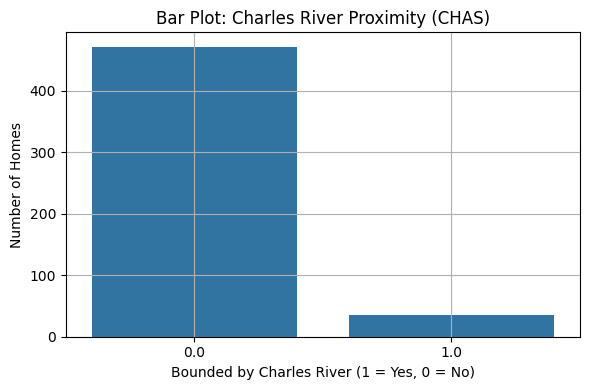

In [45]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt


# Hypotheses:
# H0: No difference in MEDV for CHAS = 0 and CHAS = 1
# H1: There is a difference

# Split into two groups
river_yes = boston_df[boston_df['CHAS'] == 1]['MEDV']
river_no = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform independent two-sample t-test
t_stat, p_val = ttest_ind(river_yes, river_no)

print(f"T-test statistic = {t_stat:.4f}, p-value = {p_val:.4f}")

# Conclusion
if p_val < 0.05:
    print("Reject H₀: There is a significant difference in median house values based on Charles River proximity.")
else:
    print("Fail to reject H₀: No significant difference in median house values based on river proximity.")


# 1. Boxplot for MEDV
plt.figure(figsize=(6, 4))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('Median Value ($1000s)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Bar plot for CHAS
plt.figure(figsize=(6, 4))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot: Charles River Proximity (CHAS)')
plt.xlabel('Bounded by Charles River (1 = Yes, 0 = No)')
plt.ylabel('Number of Homes')
plt.grid(True)
plt.tight_layout()
plt.show()

ANOVA F-statistic = 36.4076, p-value = 0.0000
Reject H₀: There is a significant difference in MEDV across AGE groups.


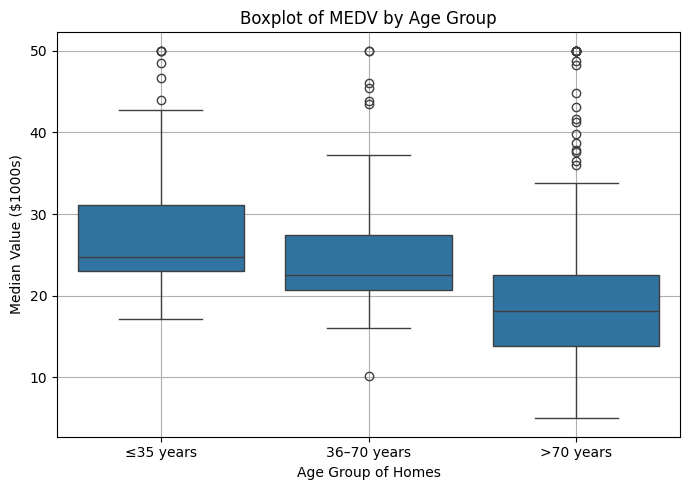

In [46]:
from scipy.stats import f_oneway
import pandas as pd

# Bin AGE into 3 groups
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['≤35 years', '36–70 years', '>70 years'])

# Extract MEDV values by group
group1 = boston_df[boston_df['AGE_GROUP'] == '≤35 years']['MEDV']
group2 = boston_df[boston_df['AGE_GROUP'] == '36–70 years']['MEDV']
group3 = boston_df[boston_df['AGE_GROUP'] == '>70 years']['MEDV']

# Run one-way ANOVA
f_stat, p_val = f_oneway(group1, group2, group3)

print(f"ANOVA F-statistic = {f_stat:.4f}, p-value = {p_val:.4f}")

# Interpret the result
if p_val < 0.05:
    print("Reject H₀: There is a significant difference in MEDV across AGE groups.")
else:
    print("Fail to reject H₀: No significant difference in MEDV across AGE groups.")

# 3. Boxplot for MEDV vs AGE (discretized into 3 groups)
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100],
                                labels=['≤35 years', '36–70 years', '>70 years'])

plt.figure(figsize=(7, 5))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV by Age Group')
plt.xlabel('Age Group of Homes')
plt.ylabel('Median Value ($1000s)')
plt.grid(True)
plt.tight_layout()
plt.show()


Pearson correlation coefficient = 0.7637
P-value = 0.0000
Reject H₀: There is a significant correlation between NOX and INDUS.


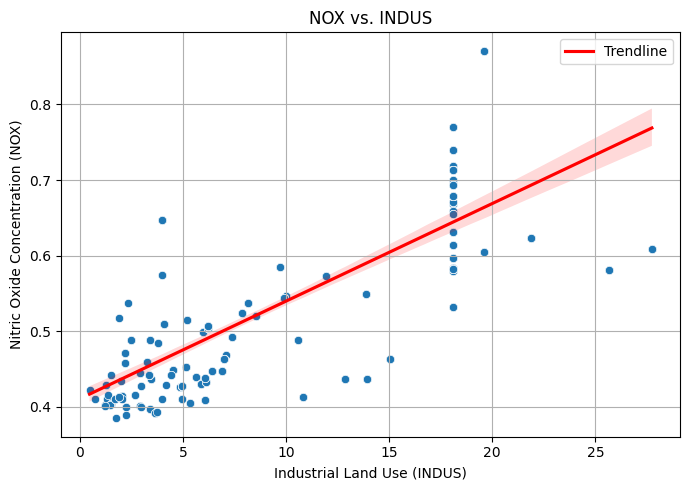

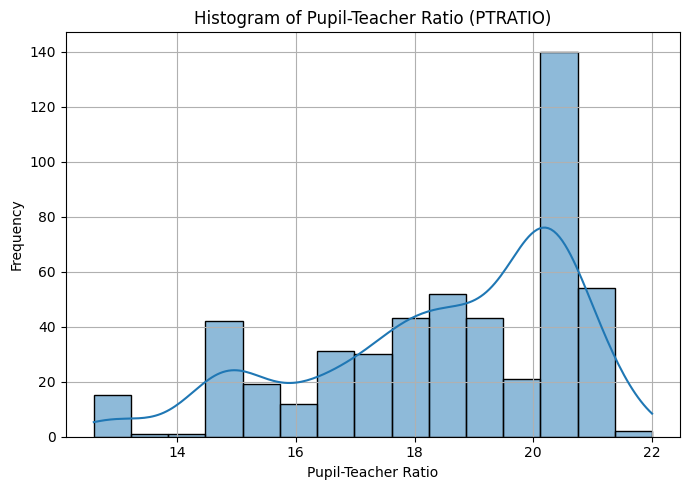

In [47]:
from scipy.stats import pearsonr

corr_coef, p_val = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson correlation coefficient = {corr_coef:.4f}")
print(f"P-value = {p_val:.4f}")

# Conclusion
if p_val < 0.05:
    print("Reject H₀: There is a significant correlation between NOX and INDUS.")
else:
    print("Fail to reject H₀: No significant correlation between NOX and INDUS.")


# 4. Scatter plot of NOX vs INDUS
plt.figure(figsize=(7, 5))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
sns.regplot(x='INDUS', y='NOX', data=boston_df, scatter=False, color='red', label='Trendline')
plt.title('NOX vs. INDUS')
plt.xlabel('Industrial Land Use (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Histogram for PTRATIO
plt.figure(figsize=(7, 5))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()
